# Venn Diagrams

Despite being a simple and popular graphing technique to represent a collection of finite elements, Venn diagrams are not as widely used in research studies as you may think.

In this exercise we will reproduce the Venn diagrams of a study involving the abundance of mosquitoes using the original dataset that was made available by the researchers.

For this exercise you will need to install an extension of the Matplotlib for creating Venn diagrams. Run the following command from a notebook cell and wait until the package is installed. You need to run this only one time:

`!pip install matplotlib-venn`

You can find out more about this module at: https://pypi.org/project/matplotlib-venn/


In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles


In [84]:
data = pd.read_csv('../datasets/mosquito_abundance.csv', sep=",")
data.head(5)


,Species,sweden_farms,sweden_peri_urban,sweden_wetlands,netherlands_farms,netherlands_peri_urban,netherlands_wetlands,italy_farms,italy_peri_urban,italy_wetlands,farms,peri_urban,wetlands
0,Aedes albopictus,0,0,0,0,0,0,37,272,4,37,272,4
1,Aedes behningi,0,2,13,0,0,0,0,0,1,0,2,14
2,Aedes berlandi,0,0,0,0,0,0,0,1,0,0,1,0
3,Aedes cantans,0,4,3,0,0,0,0,0,0,0,4,3
4,Aedes caspius,0,1,0,0,0,0,5,9,1664,5,10,1664


## Create booleans for main groups

In [85]:
idx_wetlands = data["wetlands"] > 0
idx_farms = data["farms"] > 0
idx_periurban = data["peri_urban"] > 0


In [86]:
data["Species"].loc[idx_wetlands & ~idx_periurban & ~idx_farms]


7              Aedes communis
13           Aedes leucomelas
14           Aedes mercurator
16             Aedes riparius
17             Aedes rossicus
39    Uranotaenia unguiculata
Name: Species, dtype: object

## Define collections

A = Wetlands

B = Periurban

C = Farms


In [87]:
# A: Only wetlands
A = data["Species"].loc[idx_wetlands & ~idx_farms & ~idx_periurban]

# B: Only farms
B = data["Species"].loc[~idx_wetlands & idx_farms & ~idx_periurban]

# C: Only periurban
C = data["Species"].loc[~idx_wetlands & ~idx_farms & idx_periurban]

# Wetlands and farms
AB = data["Species"].loc[idx_wetlands & idx_farms & ~idx_periurban]

# Farms and periurban
BC = data["Species"].loc[~idx_wetlands & idx_farms & idx_periurban]

# Wetland and periurban
AC = data["Species"].loc[idx_wetlands & ~idx_farms & idx_periurban]

# Wetlands, farms, and periurbans
ABC = data["Species"].loc[idx_wetlands & idx_farms & idx_periurban]


## Create Venn diagram with proportional sizes

The size of each set is determined by the number of memebers of each set. This representation will quickly and pictorially convey the differences between sets. Depending on the number of members per group this approach may or may not work.


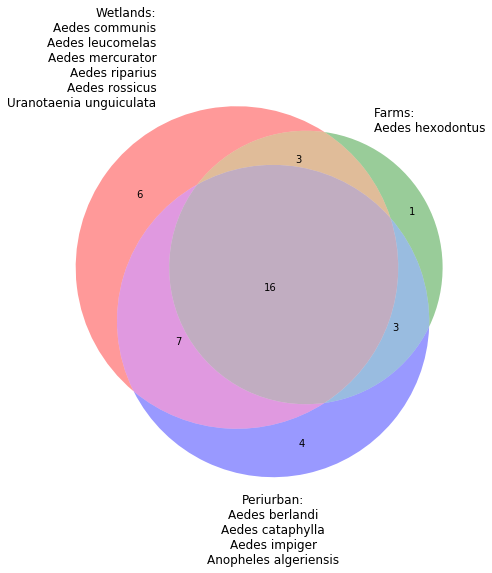

In [88]:
plt.figure(figsize=(8,8))

# A, B, AB, C, AC, BC, ABC
v = venn3(subsets=(A.size, 
                   B.size,
                   AB.size,
                   C.size,
                   AC.size,
                   BC.size,
                   ABC.size), 
          set_labels = ('\n'.join(np.append('Wetlands:',A.values)), 
                        '\n'.join(np.append('Farms:',B.values)), 
                        '\n'.join(np.append('Periurban:',C.values))))


## Venn diagrams of arbitrary size to favor legends

Another alternative is to simply assign an arbitrary size to the sets to ensure our legends read properly. In this case, we are not that conerned with the relative size between sets, but rather on communicating the different species in each environment (i.e. wetlands, farms, peri-urban). It all depends on what is the scope of the research study and the goal of the figure.


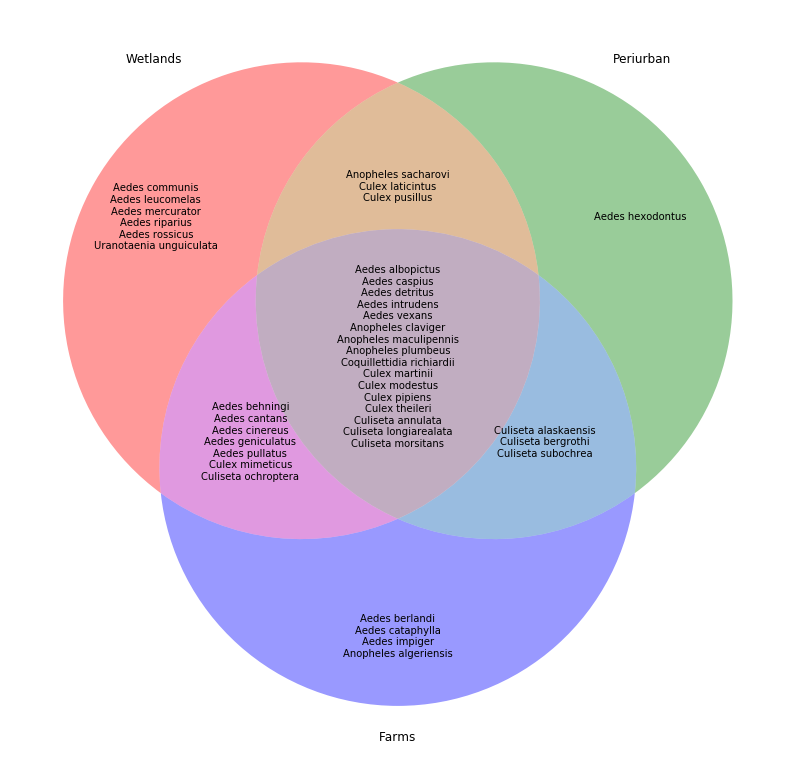

In [96]:
plt.figure(figsize=(14,14))

# A, B, AB, C, AC, BC, ABC
v = venn3(subsets=(8, 
                   8,
                   8,
                   8,
                   8,
                   8,
                   8), 
          set_labels = ('Wetlands','Periurban','Farms'))

# Add custom labels
v.get_label_by_id('100').set_text('\n'.join(A.values))
v.get_label_by_id('010').set_text('\n'.join(B.values))
v.get_label_by_id('110').set_text('\n'.join(AB.values))
v.get_label_by_id('001').set_text('\n'.join(C.values))
v.get_label_by_id('101').set_text('\n'.join(AC.values))
v.get_label_by_id('011').set_text('\n'.join(BC.values))
v.get_label_by_id('111').set_text('\n'.join(ABC.values))


*Note that there are few minor discrepancies with the original figure (Figure 2 in Möhlmann et al., 2017). I'm not entirely sure why this is the case.*

## References

Möhlmann, T.W., Wennergren, U., Tälle, M., Favia, G., Damiani, C., Bracchetti, L. and Koenraadt, C.J., 2017. Community analysis of the abundance and diversity of mosquito species (Diptera: Culicidae) in three European countries at different latitudes. Parasites & vectors, 10(1), p.510.

